In [58]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
import astropy
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
import numpy as np
#import ogr
#import shapely.wkt
#import shapely.geometry
import urllib.request
import zipfile
import json
import csv
from collections import Counter
import itertools
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import os, glob
from sklearn import decomposition
from sklearn import cluster
from sklearn import preprocessing
from sklearn.datasets import load_digits
from sklearn.decomposition import IncrementalPCA
from scipy import spatial
from io import StringIO
import importlib
from mpl_toolkits.mplot3d import Axes3D
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import PIL
from PIL import Image
import scipy.misc
import math
from scipy.spatial.distance import pdist, squareform

In [59]:
def Archimedean_Spiral(data,radius,center_x,center_y):
    #this seems doesnt work
    len_y = np.shape(data)[0]
    len_x = np.shape(data)[1]
    theta = 0
    total = radius * math.pi
    i = total * 1000
    i = math.floor(i)
    for cnt in range(0,i):
        theta = theta + 0.001
        x = (1 + 1 * theta) * np.cos(theta) + center_x
        y = (1 + 1 * theta) * np.sin(theta) + center_y
        x = math.floor(x)
        y = math.floor(y)
        if (x >= (radius + center_x)):
            print(x,y)
            break
       # print(x,y)
        data[x,y] = 1
    return data

In [60]:
def data_normalization(data): #normalizes data to a gaussian
    new_data = preprocessing.normalize(data)
    return new_data

def Get_Round_Pixel_Locations(data,radius,center_x,center_y): 
    #gets the coordinates of pixels in the round arrea. Outputs a n*2 array
    len_y = np.shape(data)[0]
    len_x = np.shape(data)[1]
    out = [[None,None]] #stores the coordinate of the pixels
    for j in range(0,len_y-1):
        for i in range(0,len_x-1):
            if ((i-center_x)**2 + (j-center_y)**2) < radius**2:
                out.append([i,j])
    out = np.delete(out, 0, 0)  # delete first row of out
    return out #Returns the Loc: location of the pixels

def Get_Ring_Pixel_Locations(data,radius_inner,radius_outer,center_x,center_y): 
    #gets the coordinates of pixels in the round arrea. Outputs a n*2 array
    len_y = np.shape(data)[0]
    len_x = np.shape(data)[1]
    out = [[None,None]] #stores the coordinate of the pixels
    for j in range(0,len_y-1):
        for i in range(0,len_x-1):
            if ((((i-center_x)**2 + (j-center_y)**2) <= radius_outer**2) & (((i-center_x)**2 + (j-center_y)**2) >= radius_inner**2) ):
                out.append([i,j])
    out = np.delete(out, 0, 0)  # delete first row of out
    return out #Returns the Loc: location of the pixels

def Get_Data(data, Loc): 
    #returns the converted pixels using the coordinates
    n = np.shape(Loc)[0]
    out = np.zeros([np.shape(Loc)[0],1])
    for i in range(0,n-1):
        out[i] = data[Loc[i,0],Loc[i,1]]
    return out

def Reconstruct_Data(data_Vec,Loc,x_len,y_len):
    n = np.shape(Loc)[0]
    out = np.zeros([x_len,y_len])
    for i in range(0,n-1):
        out[Loc[i,0],Loc[i,1]] = data_Vec[i]
    return out

def read_txt(txt,filename): #reads the txt file, converts the txt file to list
    a = []
    with open(txt, 'r') as f:
        while True:
            line = f.readline() 
            b = line.split()
            a.append(b)
            if not line:
                return a
                break     
                
def convert_label(label): #tokenize the labels
    if label == 'n':  
        out = 0
    elif label == 'm':
        out = 1
    elif label == 'o':
        out = 2
    elif label == 'p':
        out = 3
    elif label == 'i':
        out = 4
    elif label == 'u':
        out = 5
    else:
        out = 6
    return out

# def get_hourly_mean(rootDir,hour,Loc_C,Loc_R): #calculates the mean data hourly, outputs the blue and red band data
#     list_dirs = os.walk(rootDir)
#     a = ''
#     cnt1 = 0
#     cnt2 = 0
#     data1C_sum = np.zeros([np.shape(Loc_C)[0]])
#     data2C_sum = np.zeros([np.shape(Loc_C)[0]])
#     data1R_sum = np.zeros([np.shape(Loc_R)[0]])
#     data2R_sum = np.zeros([np.shape(Loc_R)[0]])
#     for root, dirs, files in list_dirs: 
#         for d in files: 
#             path = os.path.join(root, d)
#             str0 = path.split('\\')[-1]
#             str1 = str0[3]
#             str2 = str0[14]+str0[15]
            
#             if str1 == "b":
#                 if str2 == hour:
#                     cnt1 += 1
#                     image_file = path
#                     fits.info(image_file)
#                     image_data = fits.getdata(image_file, ext=0)
#                     image_data = data_normalization(np.log(image_data))
#                     data_C1 = Get_Data(image_data,Loc_C)
#                     #data_R1 = Get_Data(image_data,Loc_R)
#                     data1C_sum = data1C_sum + data_C1
#                     #data1R_sum = data1R_sum + data_R1
                    
#             elif str1 == "r":
#                 if str2 == hour:
#                     cnt2 += 1
#                     image_file = path
#                     #fits.info(image_file)
#                     image_data = fits.getdata(image_file, ext=0)
#                     image_data = data_normalization(np.log(image_data))
#                     #data_C2 = Get_Data(image_data,Loc_C)
#                     #data_R2 = Get_Data(image_data,Loc_R)
#                     #data2C_sum = data2C_sum + data_C2
#                     #data2R_sum = data2R_sum + data_R2
#             #print(str)
#     data1C_sum = data1C_sum/cnt1
#     data1R_sum = data1R_sum/cnt1
#     data2C_sum = data2C_sum/cnt2
#     data2R_sum = data2R_sum/cnt2
#     return data1C_sum, data1R_sum, data2C_sum,data2R_sum
def get_hourly_mean(rootDir,hour): #calculates the mean data hourly, outputs the blue and red band data
    list_dirs = os.walk(rootDir)
    a = ''
    cnt1 = 0
    cnt2 = 0
    data1 = np.zeros([1024,1024])
    data2 = np.zeros([1024,1024])
    for root, dirs, files in list_dirs: 
        for d in files: 
            path = os.path.join(root, d)
            str0 = path.split('\\')[-1]
            str1 = str0[3]
            str2 = str0[14]+str0[15]
            
            if str1 == "b":
                if str2 == hour:
                    cnt1 += 1
                    image_file = path
                    #fits.info(image_file)
                    image_data = fits.getdata(image_file, ext=0)
                    #image_data = data_normalization(np.log(image_data))
                    data1 = data1 + image_data
                    
            elif str1 == "r":
                if str2 == hour:
                    cnt2 += 1
                    image_file = path
                    #fits.info(image_file)
                    image_data = fits.getdata(image_file, ext=0)
                    #image_data = data_normalization(np.log(image_data))
                    data2 = data2 + image_data
            #print(str)
    data1 = data1/cnt1
    data2 = data2/cnt2
    data1 = data_normalization(data1)
    data2 = data_normalization(data2)
    return data1, data2    

def data_organizer(txtlist,Loc_C,Loc_R): #reshapes the data and restructure all data in the list. data: d*n label: n*1
    num_data = len(txtlist)
    print(num_data)
    data_bC = np.zeros([np.shape(Loc_C)[0],num_data])
    print(np.shape(data_bC))
#     data_bR = np.zeros([np.shape(Loc_R)[0],num_data])
#     data_rC = np.zeros([np.shape(Loc_C)[0],num_data])
#     data_rR = np.zeros([np.shape(Loc_R)[0],num_data])
    label_out = np.zeros(num_data)
    for i in range (num_data):
        str0 =  ''.join(txtlist[i][0:3])
        dir0 = image_folder + "\\" + str0
        hour =  ''.join(txtlist[i][3])
        label = ''.join(txtlist[i][4])
        label = convert_label(label)
        label_out[i] = label
        data1C_sum, data1R_sum, data2C_sum,data2R_sum = get_hourly_mean(dir0,hour,Loc_C,Loc_R)
        data_bC[:,i] = data1C_sum
        return data_bC,label_out
#         data_bR[:,i] = data1R_sum
#         data_rC[:,i] = data2C_sum
#         data_rR[:,i] = data2R_sum
#     return data_bC,data_bR,data_rC,data_rR,label_out
#def get_next_data(txtlist,Loc_C,Loc_R,i):
    
    

# Test on one image

In [61]:
#generate a toy data
#image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')
image_file = r'C:\USB backup\Sem1, 2019\ENGN8602\sample_data\to_b20061127ut005945s19380.fits.gz'
#image_file = r'E:\T1-Tolar.20061126.asca\net\data\ASCA\20061126\to_b20061127ut000753s16260.fits.gz'
print(image_file)
fits.info(image_file)
image_data = fits.getdata(image_file, ext=0)
plt.figure()
#plt.imshow(data_normalization(np.log(image_data)), cmap='gray')
#plt.colorbar()
image_data = data_normalization(np.log(image_data))
r_out = 470
r_in = 470/np.sqrt(2)
x = 55+470
y = 35+470
#get locations
Loc_C = Get_Round_Pixel_Locations(image_data,r_in,x,y)
Loc_R = Get_Ring_Pixel_Locations(image_data,r_in,r_out,x,y)
#get data
#data_C = Get_Data(image_data,Loc_C)
#data_R = Get_Data(image_data,Loc_R)

print(np.shape(Loc_C)[0])
print(np.shape(Loc_R)[0])

C:\USB backup\Sem1, 2019\ENGN8602\sample_data\to_b20061127ut005945s19380.fits.gz
Filename: C:\USB backup\Sem1, 2019\ENGN8602\sample_data\to_b20061127ut005945s19380.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   (1024, 1024)   int16 (rescales to uint16)   
346985
346928


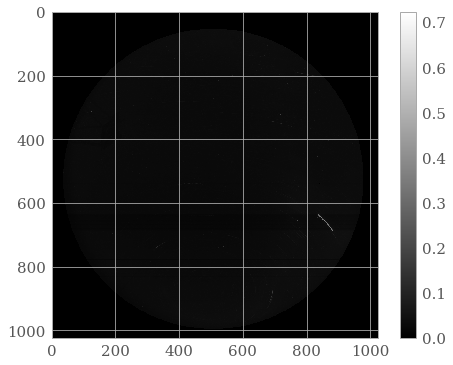

In [123]:
plt.figure
plt.imshow(data_new, cmap='gray')
plt.colorbar()

# Read bulk data

In [63]:

image_folder = 'E:\TMT_DATA_2\T2-Armazones'
txt = r'E:\TMT_DATA_2\T2-Armazones\usability_T2-Armazones_200510_200802_COMBINED .txt'
#def get_data_array(root_dir,txt):
b = read_txt(txt,image_folder)
b.remove(b[0])
b.remove(b[-1])
str0 =  ''.join(b[0][0:3])
dir0 = image_folder + "\\" + str0
print(dir0)
hour =  ''.join(b[0][3])
print(hour)
#data1C_sum, data1R_sum, data2C_sum,data2R_sum = get_hourly_mean(dir0,hour,Loc_C,Loc_R)
data1_sum, data2_sum = get_hourly_mean(dir0,hour)
# data1C_sum = np.zeros([np.shape(Loc_C)[0]])
# data2C_sum = np.zeros([np.shape(Loc_C)[0]])
# data1R_sum = np.zeros([np.shape(Loc_R)[0]])
# data2R_sum = np.zeros([np.shape(Loc_R)[0]])
data1C_sum = Get_Data(data1_sum,Loc_C)
data2C_sum = Get_Data(data2_sum,Loc_C)
data1R_sum = Get_Data(data1_sum,Loc_R)
data2R_sum = Get_Data(data2_sum,Loc_R)
print(data1C_sum.T.shape)

E:\TMT_DATA_2\T2-Armazones\20051020
00
(1, 346985)


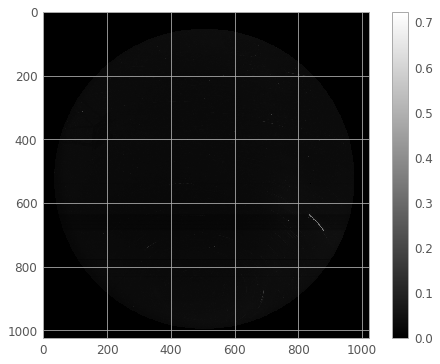

In [64]:
#data_bC,label_out = data_organizer(b,Loc_C,Loc_R)
data_C_Re = Reconstruct_Data(data1C_sum,Loc_C,1024,1024)
data_R_Re = Reconstruct_Data(data1R_sum,Loc_R,1024,1024)
data_new = data_C_Re + data_R_Re
plt.figure
plt.imshow(data_new, cmap='gray')
plt.colorbar()

950 446


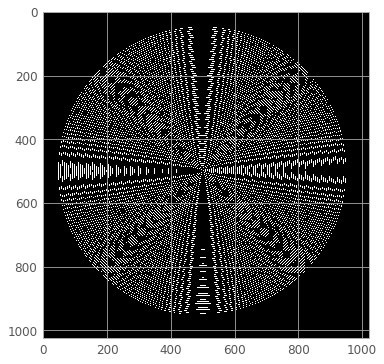

In [65]:
#test the spiral data structure
data = np.zeros([1024,1024])
new_data = Archimedean_Spiral(data,450,500,500)
plt.imshow(new_data)

# Incremental K-PCA
##### Source: https://github.com/cfjhallgren/inkpca/blob/master/inkpca/incremental_kpca.py

In [66]:


# -*- coding: utf-8 -*-

from __future__ import division, print_function

from kernels import kernel_matrix, adjust_K
from eigen_update import expand_eigensystem, update_eigensystem
import kernels

from copy import copy, deepcopy

import numpy as np
from numpy import dot, diag, ones
from scipy import linalg


def kernel_error(*args, **kwargs):
    raise ValueError("Kernel function not specified!")
def kernel_function(X):
    """
    returns the matrix of kernel
    """

  # this is an NxD matrix, where N is number of items and D its dimensionalites

    pairwise_dists = squareform(pdist(X, 'euclidean'))
    K = scip.exp(-pairwise_dists ** 2 / s ** 2)

class IncrKPCA(object):
    """
    Incremental kernel PCA
    Parameters
    ----------
    X : numpy.ndarray, 2d
        Data matrix
    m0 : int
        Initial size of kernel matrix (or Nyström subset)
    mmax : int
        Maximum size of kernel matrix (or Nyström subset)
    kernel : callable
        Kernel function
    adjust : bool
        Whether to adjust the mean
    nystrom : bool
        Calculate incremental Nyström approximation instead
    maxiter : int
        Maximum number of iterations
    Yields
    ------
    The iteration number, the calculated eigenvectors and eigenvalues, and in
    the case of the Nyström method, also the approximate eigenvalues and
    eigenvectors
    """

    def __init__(self, n, m0, mmax=None, kernel=kernel_error, adjust=False,
                     nystrom=False, maxiter=500):

        # Setup default arguments
        
        self.i = m0
        self.m0 = m0
        self.j = 0
        self.n = n
        self.maxiter = maxiter

        if mmax is None:
            mmax = n
        self.mmax = min(mmax, n)

        self.idx = np.random.permutation(n)
        self.kernel = kernel
        self.adjust = adjust
        self.nystrom = nystrom
        
        

    def fit(self,data,init):
        """
        Initiate the next iteration
        """
        # Initial eigensystem
        cols = self.idx[:m0]
        ##modify kernel_matrix
        #if it is a initial condition
        if init == 0:
            self.X = data
            K_mm = kernel_matrix(self.X,self.X, kernel, cols, cols)

            if self.adjust:
                self.L, self.U, self.capsig, self.K1 = init_vars(K_mm)
            else:
                self.L, self.U = linalg.eigh(K_mm)

            if self.nystrom:
                self.K_nm = kernel_matrix(self.X,self.X, kernel, range(n), cols)
        else:
            self.X = self.X
            if self.i == self.mmax:
                raise StopIteration
            if self.j == len(self.idx)-self.m0 or self.j == self.maxiter:
                raise StopIteration

            if not self.adjust:
                rc = self.update_eig()
                #print(rc)
            else:
                rc = self.update_eig_adjust()
            #print(rc)

            out = (self.i-1, self.L, self.U)
            if self.nystrom:
                if not rc:
                    self.L_nys, self.U_nys = nystrom_approximation(self.L, self.U, self.K_nm)
                    out = (self.i-1, self.L, self.U, self.L_nys, self.U_nys)

            self.j += 1

            if rc:
                print(rc)
                return self.next()
            else:
                print(out)
                return out

    def update_K_nm(self):
        """
        Update K_nm for one iteration by adding another column
        """
        i = self.i
        K_ni = kernel_matrix(self.X, self.kernel, range(self.n), [self.idx[i]])
        self.K_nm = np.c_[self.K_nm, K_ni]

    def update_eig(self):
        """
        Update the eigendecomposition of K with an additional data point
        """
        i = self.i # index of new data points / size of existing K
        col = self.idx[i]
        cols = self.idx[:i+1]
        sigma, k1, k0 = create_update_terms(self.X, cols, col, self.kernel)

        L, U = expand_eigensystem(self.L, self.U, k0[-1][0])

        # Order the eigenpairs and update terms
        idx = np.argsort(L)
        L = L[idx]
        U = U[:,idx]
        U = U[idx,:]
        k1 = k1[idx,:]
        k0 = k0[idx,:]

        L, U = update_eigensystem(L, U, k1, sigma)
        if isinstance(L, np.ndarray):
            L, U = update_eigensystem(L, U, k0, -sigma)

        if isinstance(L, np.ndarray):
            if self.nystrom:
                self.update_K_nm()
            self.idx[:i+1] = self.idx[:i+1][idx] # reorder index
            if self.nystrom:
                self.K_nm = self.K_nm[:,idx] # Reorder columns
            self.i, self.L, self.U = i+1, L, U
            rc = 0
        else: # Ignore data example
            self.idx[i:-1] = self.idx[i+1:]
            self.idx = self.idx[:-1]
            rc = 1

        return rc

    def update_eig_adjust(self):
        """
        Update the kernel PCA solution including adjustment of the mean.
        """
        i = self.i
        col = self.idx[i]
        cols = self.idx[:i+1]
        k = kernel_matrix(self.X, self.kernel, cols, [col]) # OK
        a = k[:-1,:]
        a_sum = np.sum(a)
        k_sum = np.sum(k)
        capsig2 = self.capsig + 2 * a_sum + k[-1,0]
        C = -self.capsig/i**2 + capsig2/(i+1)**2
        u =  self.K1/(i*(i+1)) - a/(i+1) + 0.5 * C * ones((i,1))
        u1 = 1 + u
        u2 = 1 - u
        sigma_u = 0.5

        K1 = np.r_[self.K1 + a, [[k_sum]]]
        capsig = capsig2
        v = k - (ones((i+1,1)) * k_sum + K1 - capsig/(i+1)) / (i+1)
        v1 = deepcopy(v)
        v2 = deepcopy(v)
        v0 = copy(v[-1,0])
        v1[-1,0] = v0 / 2
        v2[-1,0] = v0 / 4
        sigma_k = 4 / v0

        # Apply rank one updates
        L, U = update_eigensystem(self.L, self.U, u1, sigma_u)
        if isinstance(L, np.ndarray):
            L, U = update_eigensystem(L, U, u2, -sigma_u)
        if isinstance(L, np.ndarray):
            L, U = expand_eigensystem(L, U, v0/4)

            # Ordering
            idx = np.argsort(L)
            L = L[idx]
            U = U[:,idx]
            U = U[idx,:]
            v1 = v1[idx,:]
            v2 = v2[idx,:]

            L, U = update_eigensystem(L, U, v1, sigma_k)

        if isinstance(L, np.ndarray):
            L, U = update_eigensystem(L, U, v2, -sigma_k)

        if isinstance(L, np.ndarray):
            if self.nystrom:
                self.update_K_nm()
            K1 = K1[idx,:]
            self.idx[:i+1] = self.idx[:i+1][idx] # Reorder index
            if self.nystrom:
                self.K_nm = self.K_nm[:,idx] # Reorder columns
            self.i, self.L, self.U, self.K1 = i+1, L, U, K1
            self.capsig = capsig
            rc = 0
        else: # Ignore data example
            self.idx[i:-1] = self.idx[i+1:]
            self.idx = self.idx[:-1]
            rc = 1

        return rc

    def get_idx_array(self):
        return self.idx[:self.mmax]

    def __iter__(self):
        return self

def init_vars(K_mm):
    """
    Create initial eigenpairs and adjustment variables
    Parameters
    ----------
    K_mm : np.ndarray, 2d
        Initial kernel matrix
    Returns
    -------
    Initial eigenvalues L and eigenvectors U, sum of all values of K_mm
    (capsig), sum of the rows of K_mm (K1)
    """
    m0 = K_mm.shape[0]
    Kp = adjust_K(K_mm)
    L, U = linalg.eigh(Kp)
    capsig = np.sum(np.sum(K_mm))
    K1 = dot(K_mm, ones((m0, 1)))

    return L, U, capsig, K1

def create_update_terms(X, cols, col, kernel):
    """
    Create the terms supplied to eigenvalue update algorithm
    Parameters
    ----------
    X : np.ndarray, 2d
        Data matrix
    cols : np.ndarray, 1d
        Indices of columns to create the kernel matrix
    col : float
        The additional column index
    Returns
    -------
    Parameters supplied to update algorithm for
    eigendecomposition
    """
    k1 = kernel_matrix(X, kernel, cols, [col])
    k = copy(k1[-1][0])
    k1[-1] = k / 2
    k0 = deepcopy(k1) # numpy pass by reference
    k0[-1] = k / 4
    sigma = 4 / k

    return sigma, k1, k0

def nystrom_approximation(L, U, K_nm):
    """
    Create the Nyström approximations to the eigenpairs of the kernel matrix
    Parameters
    ----------
    L : numpy.ndarray, 2d
        eigenvector matrix for the matrix K_mm
    U : numpy.ndarray, 1d
        eigenvalues for the matrix K_mm
    K_nm : numpy.ndarray, 2d
        the m sampled columns of K
    Returns
    -------
    Nyström approximate eigenvalues L and eigenvectors U
    """
    n, m = K_nm.shape
    L_nys = n/m * L
    U_nys = np.sqrt(m/n) * dot(K_nm, dot(U, diag(1/L)))

    return L_nys, U_nys


In [67]:
#from data import get_magic_data
#from linalg import *

import numpy as np
from numpy import eye, zeros, dot, diag
from scipy import linalg
from itertools import product
from nose.tools import assert_almost_equal, assert_less, set_trace


def test_rank_one_eigenvalues():
    L = np.arange(1,4)
    A = np.diag(L)
    z = np.arange(1,4) / 5.0
    z = np.expand_dims(z,1)
    sigma = 1
    A2 = A + sigma * dot(z,z.T)
    exp, _ = linalg.eigh(A2)
    act = rank_one_eigenvalues(L, z, sigma)
    for i in product(range(3)):
        assert_almost_equal(exp[i], act[i])

def test_rank_one_eigenvectors():
    A = np.array([[1, 1, 1],
                  [1, 2, 1],
                  [1, 1, 3]])
    L, U = linalg.eigh(A)
    v = np.arange(1,4)
    v = np.expand_dims(v,1)
    z = dot(U.T,v)
    sigma = 1
    A2 = A + sigma * dot(v,v.T)
    L_exp, U_exp = linalg.eigh(A2)
    U_act = rank_one_eigenvectors(L, L_exp, U, z)
    for i,j in product(range(3),range(3)):
        assert_almost_equal(np.abs(U_exp[i,j]), np.abs(U_act[i,j]))

def test_nystrom_approx():
    datasize=100
    fraction=0.1

    X = get_magic_data()
    X = X[:datasize]
    cols = range(int(fraction*datasize))
    all_cols = range(datasize)

    K_mm, K_nm = kernel_matrices(X, rbf, cols)
    K = kernel_matrix(X, rbf, all_cols, all_cols)
    L, U = linalg.eigh(K_mm)
    L_nys, U_nys = nystrom_approximation(L, U, K_nm)
    K_nys = dot(U_nys, dot(diag(L_nys), U_nys.T))

    # F norm of difference
    fnorm = np.sqrt(np.sum(np.sum(np.power(K - K_nys, 2))))
    assert_less(fnorm / datasize, datasize)
#a = test_rank_one_eigenvectors()

In [81]:
import kernels
image_folder = 'E:\TMT_DATA_2\T2-Armazones'
txt = r'E:\TMT_DATA_2\T2-Armazones\usability_T2-Armazones_200510_200802_COMBINED .txt'
#def get_data_array(root_dir,txt):
b = read_txt(txt,image_folder)
b.remove(b[0])
b.remove(b[-1])
txtlist = b
str0 =  ''.join(b[0][0:3])
dir0 = image_folder + "\\" + str0
print(dir0)
hour =  ''.join(b[0][3])
print(hour)
num_data = len(txtlist)
print(num_data)
#data_bC = np.zeros([np.shape(Loc_C)[0],num_data])
#print(np.shape(data_bC))
label_out = np.zeros(num_data)

for i in range (500):    
    str0 =  ''.join(txtlist[i][0:3])
    dir0 = image_folder + "\\" + str0
    hour =  ''.join(txtlist[i][3])
    label = ''.join(txtlist[i][4])
    label = convert_label(label)
    label_out[i] = label
    data1_sum, data2_sum = get_hourly_mean(dir0,hour)
    
    if i == 0:
        data1C_sum = Get_Data(data1_sum,Loc_C).T
        data2C_sum = Get_Data(data2_sum,Loc_C).T
        data1R_sum = Get_Data(data1_sum,Loc_R).T
        data2R_sum = Get_Data(data2_sum,Loc_R).T
    else:
        data1C_sum = np.concatenate((data1C_sum, Get_Data(data1_sum,Loc_C).T), axis=0) 
for j in IncrKPCA(data1C_sum.T,1,mmax = None, kernel = kernels.rbf):
    print(j)

E:\TMT_DATA_2\T2-Armazones\20051020
00
7722


c:\users\tony\anaconda3\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: invalid value encountered in true_divide
c:\users\tony\anaconda3\lib\site-packages\ipykernel_launcher.py:150: RuntimeWarning: invalid value encountered in true_divide


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [68]:
print(i)

2


In [118]:
class Counter:
    def __init__(self, low, high):
        self.current = low
        self.high = high

    def __iter__(self):
        return self

    def __next__(self): # Python 3: def __next__(self)
        if self.current > self.high:
            raise StopIteration
        else:
            self.current += 1
            return (self.current - 1, self.high)


for c in Counter(3, 8):
    print(c)

(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)


In [69]:
X, _ = load_digits(return_X_y=True)
print(np.shape(X))
x1 = X[10,:]
x1 = x1.reshape((8,8))
plt.figure
n = np.shape(X)[0]
batch_n = 100
iter_n = n//batch_n + 1
transformer = IncrKPCA(X, m0, mmax=None, kernel=rbf, adjust=False,
                     nystrom=False, maxiter=500)
X_transformed = np.zeros(1)
X_transformed = X_transformed.tolist()
for i in range (iter_n):
    data_new = X[i*batch_n:(i+1)*batch_n,:]
    X_transformed.extend(transformer.fit_transform(data_new))
    
X_transformed = X_transformed[1:]
X_transformed = np.asarray(X_transformed)
print(X_transformed)
    

# transformer = IncrementalPCA(n_components=7, batch_size=200)
# # either partially fit on smaller batches of data
# transformer.partial_fit(X[:100, :])
# IncrementalPCA(batch_size=200, copy=True, n_components=7, whiten=False)
# # or let the fit function itself divide the data into batches
# X_transformed = transformer.fit_transform(X)
# plt.imshow(x1, cmap='gray')
# X_transformed.shape

(1797, 64)


NameError: name 'm0' is not defined

In [104]:
from data import get_magic_data
from kernels import kernel_matrix, rbf
from incremental_kpca import nystrom_approximation
from scipy import linalg
import incremental_kpca

import numpy as np
from numpy import eye, zeros, dot, diag

from itertools import product
from nose.tools import assert_almost_equal, assert_less, set_trace


def test_rank_one_eigenvalues():
    L = np.arange(1,4)
    A = np.diag(L)
    z = np.arange(1,4) / 5.0
    z = np.expand_dims(z,1)
    sigma = 1
    A2 = A + sigma * dot(z,z.T)
    exp, _ = linalg.eigh(A2)
    act = rank_one_eigenvalues(L, z, sigma)
    for i in product(range(3)):
        assert_almost_equal(exp[i], act[i])

def test_rank_one_eigenvectors():
    A = np.array([[1, 1, 1],
                  [1, 2, 1],
                  [1, 1, 3]])
    L, U = linalg.eigh(A)
    v = np.arange(1,4)
    v = np.expand_dims(v,1)
    z = dot(U.T,v)
    sigma = 1
    A2 = A + sigma * dot(v,v.T)
    L_exp, U_exp = linalg.eigh(A2)
    U_act = rank_one_eigenvectors(L, L_exp, U, z)
    for i,j in product(range(3),range(3)):
        assert_almost_equal(np.abs(U_exp[i,j]), np.abs(U_act[i,j]))

def test_nystrom_approx():
    datasize=100
    fraction=0.1

    X = get_magic_data()
    X = X[:datasize]
    cols = range(int(fraction*datasize))
    all_cols = range(datasize)

    K_mm, K_nm = kernel_matrices(X, rbf, cols)
    K = kernel_matrix(X, rbf, all_cols, all_cols)
    L, U = linalg.eigh(K_mm)
    L_nys, U_nys = nystrom_approximation(L, U, K_nm)
    K_nys = dot(U_nys, dot(diag(L_nys), U_nys.T))

    # F norm of difference
    fnorm = np.sqrt(np.sum(np.sum(np.power(K - K_nys, 2))))
    assert_less(fnorm / datasize, datasize)

In [122]:
# -*- coding: utf-8 -*-

from __future__ import division, print_function

# This package
import data
from incremental_kpca import IncrKPCA, nystrom_approximation
from kernels import kernel_matrix, rbf, adjust_K, median_distance

# Built-in modules
import sys
from time import time

# External modules
import numpy as np
from numpy import dot, diag
from matplotlib import pyplot as plt
from matplotlib import rcParams
from itertools import combinations_with_replacement

# Matplotlib config
rcParams['font.family'] = 'serif'
rcParams['axes.titlesize'] = 21
rcParams['axes.labelsize'] = 19
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15


def main(dataset='magic', datasize=1000):
    """
    Run experiments for the incremental kernel PCA algorithm and the
    incremental Nyström approximation.
    After each plot is shown the program halts, close the plot to continue.
    Parameters
    ----------
    dataset : str
        Either 'magic' or 'yeast'
    datasize : int or None
        Size of dataset for Nyström comparison
    """

    if not dataset in ('magic', 'yeast'):
        raise ValueError("Unknown dataset.")

    f = open("C:\\USB backup\\Sem1, 2019\\ENGN8602\\yeast")
    print(f)
    data = []
    for line in f.readlines():
        line = line.split('  ')
        line = line[1:-1] # keep float values
        try:
            np.asarray(line, dtype=np.float64)
        except:
            continue
        data.append(line)
    X = np.asarray(data, dtype=np.float64)

    if datasize:
        Xcut = X[:datasize]
    
    n = 1000
    dist = np.zeros((n+1)*n//2)
    for k, t in enumerate(combinations_with_replacement(range(n),2)):
        dist[k] = np.sqrt(np.sum(np.power(X[t[0],:] - X[t[1],:],2)))
    sigma = np.median(dist)

    kernel = lambda x, y: rbf(x, y, sigma)

    mmax = 100

    m0 = 20

    #incremental_experiment(X, m0, mmax, kernel, dataset)

    #incremental_experiment(X, m0, mmax, kernel, dataset, adjust=True)

    nystrom_experiment(Xcut, m0, mmax, kernel, dataset)


def incremental_experiment(X, m0, mmax, kernel, dataset, adjust=False):
    """
    Experiment for the incremental kernel pca algorithm. For each additional
    data point the difference in Frobenius norm between incremental and batch
    calculation is plotted (termed drift).
    Parameters
    ----------
    X : numpy.ndarray, 2d
        Data matrix
    m0 : int
        Initial size of kernel matrix
    mmax : int
        Maximum size of kernel matrix
    kernel : callable
        Kernel function
    dataset : str
        Either 'magic' or 'yeast'
    adjust : bool
        Whether to adjust the mean
    """
    print("\nIncremental kernel PCA")
    inc = incremental_kpca.IncrKPCA(X, m0, mmax, adjust=adjust, kernel=kernel)
    fnorms = []
    for i, L, U in inc:
        idx = inc.get_idx_array()
        K = kernel_matrix(X, kernel, idx[:i+1], idx[:i+1])
        if adjust:
            K = adjust_K(K)
        K_tilde = dot(U, dot(diag(L), U.T))
        fnorm = np.sqrt(np.sum(np.sum(np.power(K - K_tilde, 2))))
        fnorms.append(fnorm)

    plotting(np.arange(len(fnorms))+m0, fnorms, dataset, "m", "Frobenius norm")

def nystrom_experiment(X, m0, mmax, kernel, dataset):
    """
    Incremental calculation of the Nyström approximation to the kernel matrix.
    For each data point the difference in Frobenius norm between the
    approximation and the full kernel matrix is plotted.
    Parameters
    ----------
    X : numpy.ndarray, 2d
        Data matrix
    m0 : int
        Initial size of Nyström subset
    mmax : int
        Maximum size of Nyström subset
    kernel : callable
        Kernel function
    dataset : str
        Either 'magic' or 'yeast'
    """
    print("\nIncremental Nyström approximation")
    inc = IncrKPCA(X, m0, mmax, kernel=kernel, nystrom=True)
    idx = inc.get_idx_array()
    n = X.shape[0]
    K = kernel_matrix(X, kernel, range(n), range(n))
    fnorms = []
    for i, L, U, L_nys, U_nys in inc:
        K_tilde = dot(U_nys, dot(diag(L_nys), U_nys.T))
        fnorm = np.sqrt(np.sum(np.sum(np.power(K - K_tilde, 2))))
        fnorms.append(fnorm)

    plotting(range(m0, m0+len(fnorms)), fnorms, dataset, "m", "Frobenius norm")


def plotting(x, y, title, xlabel, ylabel):
    plt.figure()
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    print(*sys.argv[1:])
    main("yeast",1000)

-f C:\Users\Tony\AppData\Roaming\jupyter\runtime\kernel-9cb47d5c-f5cb-4c14-a54b-dc247b43c152.json
<_io.TextIOWrapper name='C:\\USB backup\\Sem1, 2019\\ENGN8602\\yeast' mode='r' encoding='cp936'>

Incremental Nyström approximation


TypeError: iter() returned non-iterator of type 'IncrKPCA'

In [85]:
f = open("C:\\USB backup\\Sem1, 2019\\ENGN8602\\yeast")
print(f)
data = []
for line in f.readlines():
    line = line.split('  ')
    line = line[1:-1] # keep float values
    try:
        np.asarray(line, dtype=np.float64)
    except:
        continue
    data.append(line)
data = np.asarray(data, dtype=np.float64)
print(data)

<_io.TextIOWrapper name='C:\\USB backup\\Sem1, 2019\\ENGN8602\\yeast' mode='r' encoding='cp936'>
[[0.58 0.61 0.47 ... 0.   0.48 0.22]
 [0.43 0.67 0.48 ... 0.   0.53 0.22]
 [0.64 0.62 0.49 ... 0.   0.53 0.22]
 ...
 [0.67 0.57 0.36 ... 0.   0.56 0.22]
 [0.43 0.4  0.6  ... 0.   0.53 0.39]
 [0.65 0.54 0.54 ... 0.   0.53 0.22]]


In [100]:
n = 1000
dist = np.zeros((n+1)*n//2)